# バックテスト検証ノート

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../'

/home/tsu-nera/repo/bakuchi


In [3]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [4]:
timestamp="2003180312"

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(19095, 19095)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=1000)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-18 03:19:25,liquid,coincheck,BTC/JPY,0.009,9
1,2020-03-18 03:23:01,coincheck,liquid,BTC/JPY,0.009,0
2,2020-03-18 03:23:12,liquid,coincheck,BTC/JPY,0.009,9
3,2020-03-18 03:26:31,coincheck,liquid,BTC/JPY,0.009,1
4,2020-03-18 03:29:01,liquid,coincheck,BTC/JPY,0.009,9
...,...,...,...,...,...,...
125,2020-03-18 09:00:09,coincheck,liquid,BTC/JPY,0.009,0
126,2020-03-18 09:01:23,liquid,coincheck,BTC/JPY,0.009,10
127,2020-03-18 09:02:11,coincheck,liquid,BTC/JPY,0.009,0
128,2020-03-18 09:02:34,liquid,coincheck,BTC/JPY,0.009,11


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-18 03:19:25,買い,liquid,584327.0
1,2020-03-18 03:19:25,売り,coincheck,585343.0
2,2020-03-18 03:23:01,買い,coincheck,582019.0
3,2020-03-18 03:23:01,売り,liquid,582033.0
4,2020-03-18 03:23:12,買い,liquid,581273.0
...,...,...,...,...
255,2020-03-18 09:02:11,売り,liquid,580724.0
256,2020-03-18 09:02:34,買い,liquid,581782.0
257,2020-03-18 09:02:34,売り,coincheck,583040.0
258,2020-03-18 09:03:38,買い,coincheck,580877.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
--------  -------------------
開始日時  2020-03-18 03:12:37
終了日時  2020-03-18 09:04:56
--------  -------------------
利確しきい値 1000(JPY)
損切りマージン 1000(JPY)
取引単位 0.009(BTC)
--------

バックテスト結果
---------  ------
利益(BTC)  -0
元金(BTC)   0.022
資産(BTC)   0.022
---------  ------
----------  -----
レコード数  19095
取引回数      130
利益(JPY)     728
元金(JPY)   12000
資産(JPY)   12728
----------  -----


## グラフ出力

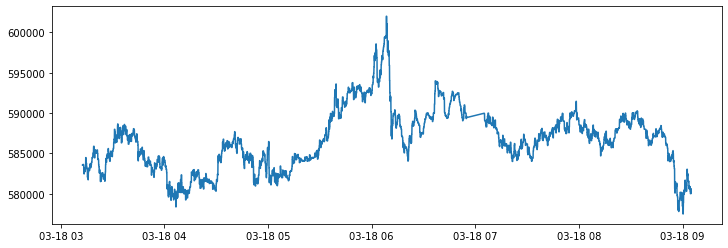

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

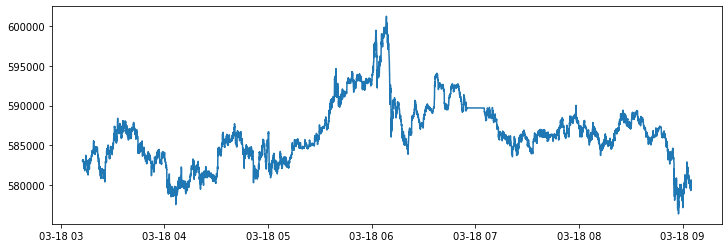

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-18 03:10:00,-850,243,583676,583433,583217,584067
2020-03-18 03:20:00,-1047,404,583809,583405,583189,584235
2020-03-18 03:30:00,-924,239,587250,587010,586764,587687
2020-03-18 03:40:00,-821,213,585780,585567,585371,586192
2020-03-18 03:50:00,-776,129,583646,583517,583273,584049
2020-03-18 04:00:00,-1080,338,580742,580404,580097,581177
2020-03-18 04:10:00,-664,-24,581293,581317,581023,581687
2020-03-18 04:20:00,-623,55,581336,581281,581090,581713
2020-03-18 04:30:00,-647,33,585252,585219,584997,585644
